# SUPERVISED MACHINE LEARNING

Making the computer learn from a set of labeled data, i.e., making the computer predict a certain output (or label) from a set of predictors.

1. Regression
    - Linear Regression (Simple and Multiple)
2. Classification
    - Logistic Regression
    - K-Nearest Neighbors

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/administrator/anaconda/envs/py2710/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Regression

We'll be working with data taken from University of California - Irvine's Machine Learning archive. Specifically, the boston housing prices. The data can be taken from the site http://archive.ics.uci.edu/ml/. If you want to make your own linear regression model, just go to that site and click <b> VIEW ALL DATASETS </b>.

In [3]:
# Loading the Data set we downloaded. 
house_data = pd.read_csv('housing.data.csv', delim_whitespace=True, names = ['CRIM','ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

In [4]:
# Now let's look at our data
house_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Now notice that we have 13 <b>Predictor</b> variables and one (1) <b> Response</b> variable (MEDV). The details of these variable can be found here: http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names . But for convenience, let's copy it onto our iPython Notebook.

Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per USD 10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's


### Exploratory Data Analysis

Let's have a quick look of the relationships among these variables, just so that we can have a rough sketch of how they are all related to each other.

In [74]:
# But first, let me group these variables together by Predictors (X) and Responses (Y)
columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
X = house_data[columns].copy()
y = house_data['MEDV'].copy()

/Users/administrator/anaconda/envs/py2710/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


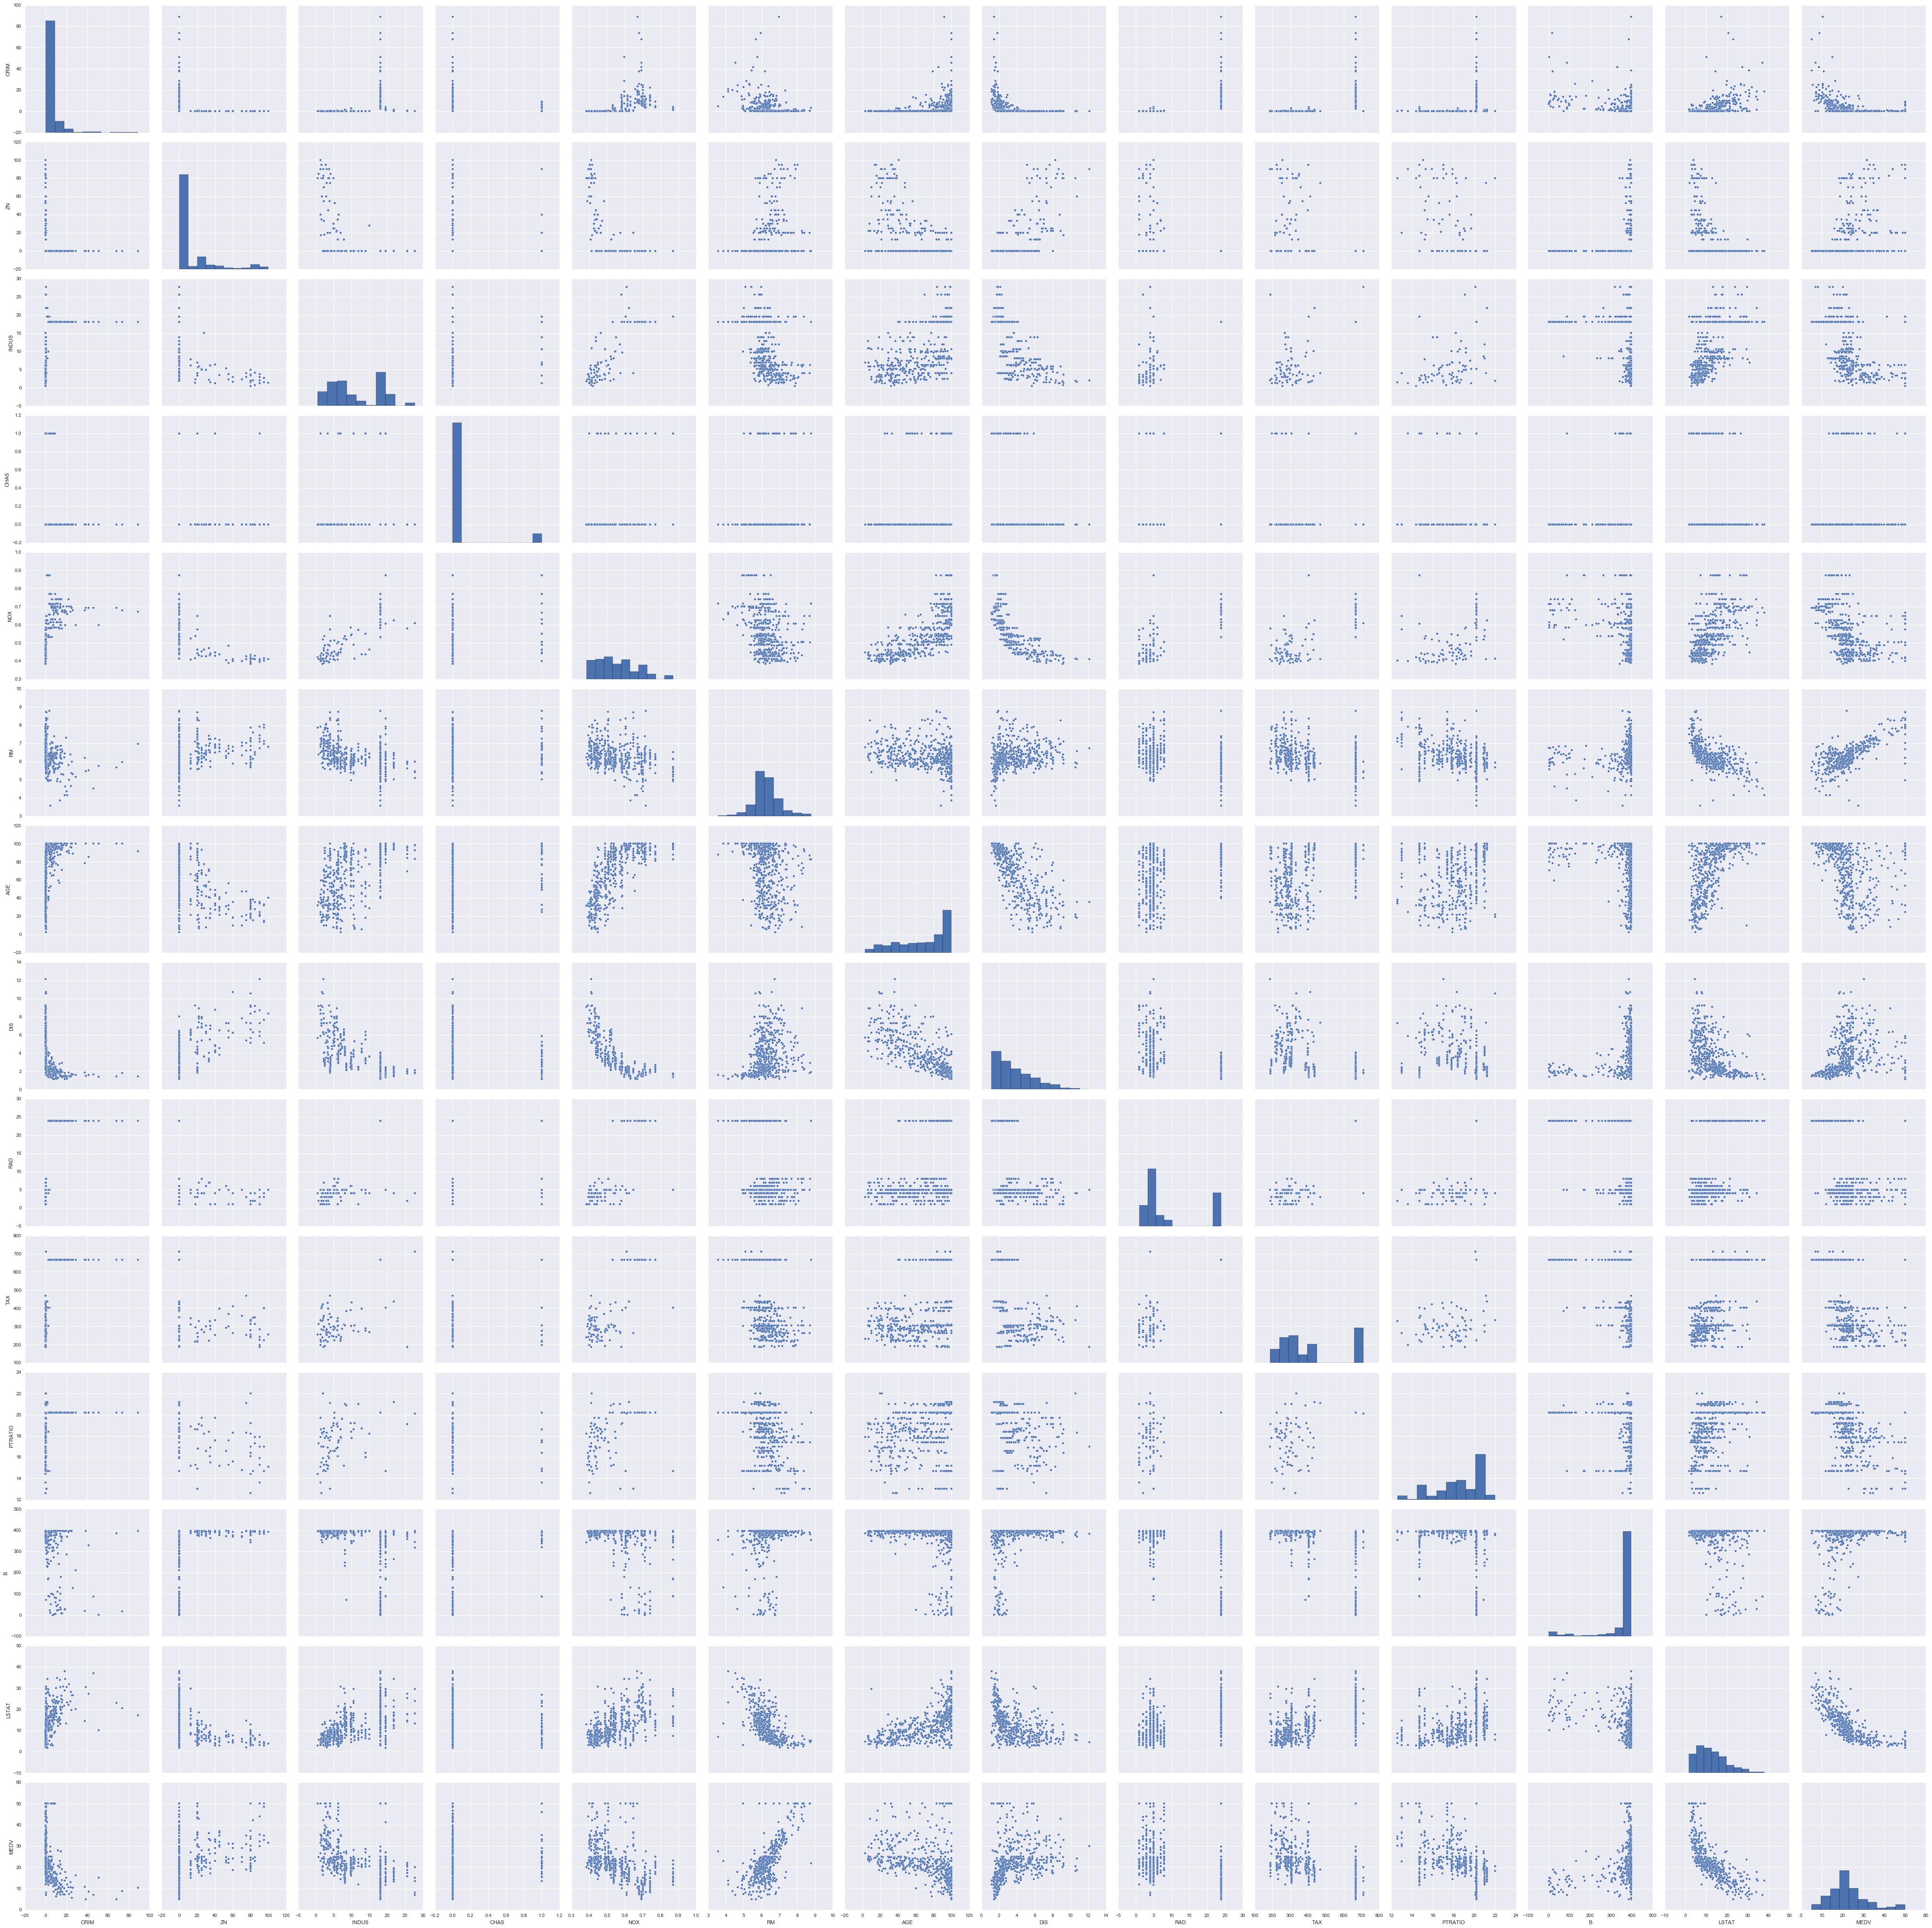

In [6]:
# Now let's proceed with the relationships
sns.pairplot(house_data, kind = 'scatter', size=4)

In [7]:
house_data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


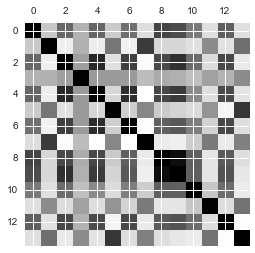

In [8]:
plt.matshow(house_data.corr())

### Simple Linear Regression

Let's say that we want the CRIME RATE (CRIM) to be a predictor of Median House Price (MEDV).

In [9]:
# Saving the variable CRIM to a separate variable.
X_simple = house_data['CRIM'].copy()

# Instantiating the Linear Regression Model
from sklearn.linear_model import LinearRegression
simple_model = LinearRegression()

# Fitting the data
simple_model.fit(X_simple.reshape(-1,1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

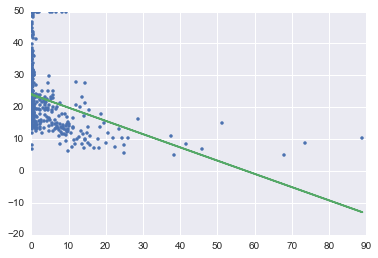

In [10]:
# Looking at our data and model
plt.plot(X_simple, y,'.')
plt.plot(X_simple, simple_model.predict(X_simple.reshape(-1,1)), '-')

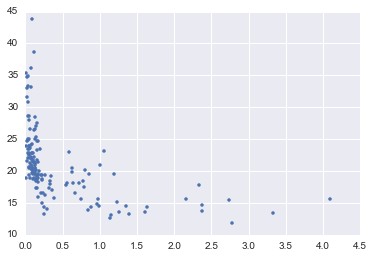

In [67]:
plt.plot(X_simple[:150], y[:150], '.')

In [68]:
len(X_simple[X_simple < 0.5])

294

In [70]:
house_data[house_data['CRIM'] < 0.5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [71]:
house_data[house_data['CRIM'] >= 0.5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
13,0.62976,0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
14,0.63796,0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
15,0.62739,0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
16,1.05393,0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58,23.1
17,0.78420,0,8.14,0,0.538,5.990,81.7,4.2579,4,307,21.0,386.75,14.67,17.5
18,0.80271,0,8.14,0,0.538,5.456,36.6,3.7965,4,307,21.0,288.99,11.69,20.2
19,0.72580,0,8.14,0,0.538,5.727,69.5,3.7965,4,307,21.0,390.95,11.28,18.2
20,1.25179,0,8.14,0,0.538,5.570,98.1,3.7979,4,307,21.0,376.57,21.02,13.6
21,0.85204,0,8.14,0,0.538,5.965,89.2,4.0123,4,307,21.0,392.53,13.83,19.6
22,1.23247,0,8.14,0,0.538,6.142,91.7,3.9769,4,307,21.0,396.90,18.72,15.2


It seems that we have an issue with the data: A lot of data are gathering below the 0.5 Criminal Rate. For ease, let's remove all that data and see how our simple regression model fits our data

In [72]:
crim_less = house_data[house_data['CRIM'] >= 0.5]

In [77]:
# Instantiating the data into variables
X_simple_mod = crim_less['CRIM']
y_simple_mod = crim_less['MEDV']

# Instantiating a new linear model
simple_model_mod = LinearRegression()

# Fitting the new model
simple_model_mod.fit(X_simple_mod.reshape(-1,1), y_simple_mod)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let's take a quick look.

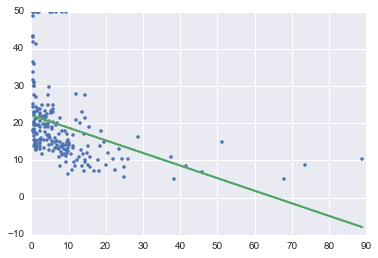

In [79]:
plt.plot(X_simple_mod, y_simple_mod, '.')
plt.plot(X_simple_mod, simple_model_mod.predict(X_simple_mod.reshape(-1,1)),'-')

It seems that our editing didn't do much of an improvement.

### Multiple Linear Regression

In [11]:
# Instantiating the model
multi_linear_model = LinearRegression()

# Fitting to multivariate data
multi_linear_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

But that's just including everything. Let's do backward selection.

In [12]:
multi_linear_model.coef_

array([ -1.08011358e-01,   4.64204584e-02,   2.05586264e-02,
         2.68673382e+00,  -1.77666112e+01,   3.80986521e+00,
         6.92224640e-04,  -1.47556685e+00,   3.06049479e-01,
        -1.23345939e-02,  -9.52747232e-01,   9.31168327e-03,
        -5.24758378e-01])

And the RMSE of our model is...

In [13]:
# Assessing the RMSE of the model
from sklearn.cross_validation import cross_val_score
print np.sqrt(-cross_val_score(multi_linear_model,X,y,cv=10, scoring = 'mean_squared_error')).mean()

5.18084567934


In [14]:
print columns

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


Sadly, scikit-learn is built for predictive analytics, not the traditional statistical approach. However, one may use StatsModels, but that's a story for another day. For now, let it suffice that we "arbitrarily" remove predictors and assess performance by printing the RMSE of that model. </br>

Let's first remove <b>CHAS</b> since it's a binary variable

In [15]:
columns_new = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [16]:
# Making a new estimator
multi_linear_model_mod = LinearRegression()

# Assessing the RMSE of the new model
print np.sqrt(-cross_val_score(multi_linear_model_mod,X[columns_new],y,cv=10, scoring = 'mean_squared_error')).mean()

5.15224217448


And we see that doing so improves our model by decreasing RMSE. Now let's remove <b>DIS</b> since it's the next least correlated variable with the response variable

In [17]:
columns_new_2 = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [18]:
# Assessing the RMSE of the new model
print np.sqrt(-cross_val_score(multi_linear_model_mod,X[columns_new_2],y,cv=10, scoring = 'mean_squared_error')).mean()

5.39867019308


We see that removing DIS makes our model worse off. Let's try removing something else: <b> B </b>

In [19]:
columns_new_3 = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'DIS', 'LSTAT']

In [19]:
# Assessing the RMSE of the new model
print np.sqrt(-cross_val_score(multi_linear_model_mod,X[columns_new_3],y,cv=10, scoring = 'mean_squared_error')).mean()

5.18344029012


Since Scikit-Learn isn't optimized for the traditional Backward Selection method, we'll work with what we can and define a function that goes through ALL possible combinations and find the least RMSE. </br></br></br>

As an aside, it's worth mentioning that the packages statsmodels and patsy are optimized to do the traditional Linear Regression steps in the same way R is.

In [20]:
import itertools
for k in range(1,13):    
    print 'Number of factors: ', k
    for p in itertools.combinations(columns, k):
        print p,
        print np.sqrt(-cross_val_score(multi_linear_model_mod,X[list(p)],y,cv=10, scoring = 'mean_squared_error')).mean()
    print '\n'

Number of factors:  1
('CRIM',) 8.32668958487
('ZN',) 8.31611938804
('INDUS',) 7.85546801527
('CHAS',) 8.84607075672
('NOX',) 8.01951972021
('RM',) 5.94157058876
('AGE',) 8.14064315612
('DIS',) 8.69981288075
('RAD',) 8.52649197626
('TAX',) 8.04301200746
('PTRATIO',) 7.77633578861
('B',) 8.34225554731
('LSTAT',) 6.21075409555


Number of factors:  2
('CRIM', 'ZN') 7.90111054448
('CRIM', 'INDUS') 7.60542856849
('CRIM', 'CHAS') 8.27057363867
('CRIM', 'NOX') 7.81926119358
('CRIM', 'RM') 5.76787600766
('CRIM', 'AGE') 7.95010015775
('CRIM', 'DIS') 8.38010575899
('CRIM', 'RAD') 8.34062253359
('CRIM', 'TAX') 7.94891880597
('CRIM', 'PTRATIO') 7.40056097821
('CRIM', 'B') 8.22487941461
('CRIM', 'LSTAT') 6.193628598
('ZN', 'INDUS') 7.78991488846
('ZN', 'CHAS') 8.19542460322
('ZN', 'NOX') 7.89720329812
('ZN', 'RM') 5.90295344273
('ZN', 'AGE') 8.00070724472
('ZN', 'DIS') 8.49011290217
('ZN', 'RAD') 8.20256755689
('ZN', 'TAX') 7.78487014409
('ZN', 'PTRATIO') 7.61492636718
('ZN', 'B') 7.8960469339
('Z

The above result should give us an idea as to which combination would give us the least RMSE. We'll settle with that for now and proceed to the next Supervised Machine Learning Algorithm.

## StatsModels

Works very much like R! Now we can do the Backward selection of the features/factors. Let's give it a go.

In [53]:
# Importing the package we need.
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [54]:
house_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [55]:
feature_set_1 = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

In [56]:
formula1 = 'MEDV ~ CRIM + ZN + INDUS + CHAS  + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT'
fit1 = ols(formula1, house_data).fit()

In [58]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 28 Dec 2015   Prob (F-statistic):          6.72e-135
Time:                        15:42:39   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000        26.432    46.487
CRIM          -0.1080      0.033     -3.287      0.001        -0.173    -0.043
ZN             0.0464      0.014      3.382      0.001         0.019     0.073
INDUS          0.0206      0.061      0.334      0.738        -0.100     0.141
CHAS           2.6867      0.862      3.118      0.002         0.994     4.380
NOX          -17.7666      3.820     -4.651      0.000       -25.272   -10.262
RM             3.8099      0.418      9.116      0.000         2.989     4.631
AGE            0.0007      0.013      0.052      0.958        -0.025     0.027
DIS           -1.4756      0.199     -7.398      0.000        -1.867    -1.084
RAD            0.3060      0.066      4.613      0.000         0.176     0.436
TAX           -0.0123      0.004     -3.280      0.001        -0.020    -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000        -1.210    -0.696
B              0.0093      0.003      3.467      0.001         0.004     0.015
LSTAT         -0.5248      0.051    -10.347      0.000        -0.624    -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Seems like the predictors <b>AGE </b> and <b>INDUS</b> aren't significant. Let's remove them from the model.

In [59]:
formula2 = 'MEDV ~ CRIM + ZN +  CHAS  + NOX + RM  + DIS + RAD + TAX + PTRATIO + B + LSTAT'
fit2 = ols(formula2, house_data).fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 28 Dec 2015   Prob (F-statistic):          5.54e-137
Time:                        15:45:17   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000        26.385    46.298
CRIM          -0.1084      0.033     -3.307      0.001        -0.173    -0.044
ZN             0.0458      0.014      3.390      0.001         0.019     0.072
CHAS           2.7187      0.854      3.183      0.002         1.040     4.397
NOX          -17.3760      3.535     -4.915      0.000       -24.322   -10.430
RM             3.8016      0.406      9.356      0.000         3.003     4.600
DIS           -1.4927      0.186     -8.037      0.000        -1.858    -1.128
RAD            0.2996      0.063      4.726      0.000         0.175     0.424
TAX           -0.0118      0.003     -3.493      0.001        -0.018    -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000        -1.200    -0.693
B              0.0093      0.003      3.475      0.001         0.004     0.015
LSTAT         -0.5226      0.047    -11.019      0.000        -0.616    -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Pretty good. Now let's move on to another Supervised Machine Learning Algorithm.

# Classification

## Logistic Regression

The data we'll work with is the record of passengers who were on the Titanic on its maiden voyage. The data can be taken from https://www.kaggle.com/c/titanic/data . Below is the description of the data.

VARIABLE DESCRIPTIONS:</b>
    1. survival        Survival (0 = No; 1 = Yes)</b>
    2. pclass          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)</b>
    3. name            Name</b>
    4. sex             Sex</b>
    5. age             Age</b>
    6. sibsp           Number of Siblings/Spouses Aboard</b>
    7. parch           Number of Parents/Children Aboard</b>
    8. ticket          Ticket Number</b>
    9. fare            Passenger Fare</b>
    10. cabin           Cabin</b>
    11. embarked        Port of Embarkation(C = Cherbourg; Q = Queenstown; S = Southampton)</b>
</b>
SPECIAL NOTES:</br></b>
Pclass is a proxy for socio-economic status (SES)</b>
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower</b></b>

Age is in Years; Fractional if Age less than One (1)</b>
 If the Age is Estimated, it is in the form xx.5</b></b>

With respect to the family relation variables (i.e. sibsp and parch)</b>
some relations were ignored.  The following are the definitions used</b>
for sibsp and parch.</b></b>

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic</b>
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)</b>
Parent:   Mother or Father of Passenger Aboard Titanic</b>
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic</b></b>

Other family relatives excluded from this study include cousins,</b>
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled</b>
only with a nanny, therefore parch=0 for them.  As well, some</b>
travelled with very close friends or neighbors in a village, however,</b>
the definitions do not support such relations.

In [21]:
# Loading the data
titanic = pd.read_csv('train.csv', names=['PassengerID','Survived', 'Pclass', 'Name', 'Sex', 'Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'])

In [22]:
titanic.head()

,PassengerID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,bplist00�_WebMainResource�\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,_WebResourceData_WebResourceMIMEType_W...,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
3,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
4,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S


There's a lesson to be learned here: when it comes to Machine Learning, you'll mostly be fixing the data so that it fits the pre-made model. The cell below accomplishes that.

In [23]:
titanic = titanic[:][2:-1] # Removes the problem with the columns
titanic.index = range(len(titanic)) # Adjusts the index

In [24]:
titanic.head()

,PassengerID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NaN,S


At this point, notice that we <b> CAN'T </b> use the variable Name, Ticket and (for convenience found in avoiding NaN values) Cabin. The Fare should be reflected in the Passenger Class. Let's skip Age for now.

This leaves us with Passenger Class, Sex, and Embarked. We'll work with those variables for now.

In [25]:
columns = ['Pclass', 'Sex', 'Embarked']

## Preparing for model evaluation

In all model building processes, you'll want to assess your model. We do this with what is called a train/test split. This process splits our data into a training set and a testing set. The model produced with the training set is evaluated and fine tuned with the test set.

If that seems confusing, don't worry. For now, just think that I'm subsetting our data and working with a portion instead of the whole thing. 

In [26]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic[columns], titanic['Survived'],test_size = 0.3, random_state=0)

In [27]:
X_train.head()

,Pclass,Sex,Embarked
857,1,male,S
52,1,female,C
386,3,male,S
124,1,male,S
578,3,female,C


Here's another concern: <b> The logistic regressor can't process string values </b>. So what do we do? We modify our data so that it accomodates what our regressor wants.

In [28]:
def alterCodingForS(entry):
    retval = 0
    if entry == 'S':
        retval = 1
    return retval

def alterCodingForC(entry):
    retval = 0
    if entry == 'C':
        retval = 1
    return retval

def alterCodingForQ(entry):
    retval = 0
    if entry == 'Q':
        retval = 1
    return retval

def alterCodingForPClass1(entry):
    retval = 0
    if entry =='1':
        retval = 1
    return retval

def alterCodingForPClass2(entry):
    retval = 0
    if entry =='2':
        retval = 1
    return retval

def alterCodingForPClass3(entry):
    retval = 0
    if entry =='3':
        retval = 1
    return retval

def alterCodingSex(sex):
    '''
    changes male to 1 and female to 0
    '''
    if sex == 'male':
        retval = 1
    else:
        retval = 0
    return retval

In [29]:
X_train['CodedSex'] = X_train['Sex'].apply(alterCodingSex)
X_train['Pclass1'] = X_train['Pclass'].apply(alterCodingForPClass1)
X_train['Pclass2'] = X_train['Pclass'].apply(alterCodingForPClass2)
X_train['Pclass3'] = X_train['Pclass'].apply(alterCodingForPClass3)
X_train['Embarked_At_S'] = X_train['Embarked'].apply(alterCodingForS)
X_train['Embarked_At_C'] = X_train['Embarked'].apply(alterCodingForC)
X_train['Embarked_At_Q'] = X_train['Embarked'].apply(alterCodingForQ)

In [30]:
X_train.head()

,Pclass,Sex,Embarked,CodedSex,Pclass1,Pclass2,Pclass3,Embarked_At_S,Embarked_At_C,Embarked_At_Q
857,1,male,S,1,1,0,0,1,0,0
52,1,female,C,0,1,0,0,0,1,0
386,3,male,S,1,0,0,1,1,0,0
124,1,male,S,1,1,0,0,1,0,0
578,3,female,C,0,0,0,1,0,1,0


This changes our choice of columns to:

In [31]:
columns = ['CodedSex', 'Pclass1', 'Pclass2', 'Pclass3', 'Embarked_At_S','Embarked_At_C', 'Embarked_At_Q']

In [32]:
X_train[columns].head()

,CodedSex,Pclass1,Pclass2,Pclass3,Embarked_At_S,Embarked_At_C,Embarked_At_Q
857,1,1,0,0,1,0,0
52,0,1,0,0,0,1,0
386,1,0,0,1,1,0,0
124,1,1,0,0,1,0,0
578,0,0,0,1,0,1,0


## Simple Logistic Regression

Remember that one line: "Women and children first!" We could say that SEX is a good predictor of survival, yeah?

In [33]:
# Importing the Regressor
from sklearn.linear_model import LogisticRegression

In [34]:
# Instantiating the regressor
simple_log = LogisticRegression()

# Fitting the model
simple_log.fit(X_train['CodedSex'].reshape(-1,1),y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
# Making predictions
y_simple_pred = simple_log.predict(X_train['CodedSex'].reshape(-1,1))

### But how good of a predictor is our model?

In [36]:
from sklearn.metrics import accuracy_score
print accuracy_score(y_train, y_simple_pred)

0.786516853933


Let's try to get the Proportion of the majority class and see if our model did better than just pure guess-work.

In [37]:
y_train.value_counts()

0    381
1    242
Name: Survived, dtype: int64

This tells us that the majority class is the dead class. That is $\frac{381}{623}$

In [38]:
`381/623.0`

'0.6115569823434992'

Pretty good. Now let's try out a Multiple Logistic Regression Model.

## Multiple Logistic Regression

In [39]:
# Instantiating the model
multi_log = LogisticRegression()

# Fitting the model
multi_log.fit(X_train[columns], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
# Making a set of predictions
y_multi_pred = multi_log.predict(X_train[columns])

In [41]:
# Measuring model accuracy
print "Accuracy: ", accuracy_score(y_train, y_multi_pred)

Accuracy:  0.775280898876


## Employing the Confusion Matrix

<b> Review </b>
<b> Basic Terminology </b>

1. <b> True Postives  (TP)</b> : we CORRECTLY predicted that they DID survive. </br>
2. <b> True Negatives (TN)</b> : we CORRECTLY predicted that they DIDN'T survive. </br>
3. <b> False Positives (FP)</b> : we INCORRECTLY predicted that they DID survive. (Type I error) </br>
4. <b> False Negatives (FN) </b> : we INCORRECTLY predicted that they DIDN'T survive. (Type II error)

In [42]:
# Importing the confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [43]:
print confusion_matrix(y_train, y_multi_pred)

[[311  70]
 [ 70 172]]


In [44]:
# Save confusion matrix and slice into four pieces
confusion = confusion_matrix(y_train, y_multi_pred)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [81]:
print 'Accuracy: ', accuracy_score(y_train, y_multi_pred)
print 'Misclassification Rate: ' , 1-accuracy_score(y_train, y_multi_pred)
print 'True Positive Rate (RECALL): ', TP/float(TP+FN)
print 'Specificity:, ', TN/float(TN+FP)
print 'False Positive Rate: ', FP/float(TN+FP)
print 'Precision: ', TP/float(TP+FP)

 Accuracy:  0.775280898876
Misclassification Rate:  0.224719101124
True Positive Rate (RECALL):  0.710743801653
Specificity:,  0.816272965879
False Positive Rate:  0.183727034121
Precision:  0.710743801653


F1 = $\frac{2*precision*recall}{precision+recall}$

In [46]:
print "F1 Score: ", (2*0.710743801653*0.710743801653)/float(0.710743801653+0.710743801653)

F1 Score:  0.710743801653


# UNSUPERVISED MACHINE LEARNING

## Clustering (K-Means)

In [1]:
# Importing the dataset
from sklearn.datasets import fetch_20newsgroups

# Instantiating the training data
train_data = fetch_20newsgroups(subset = 'train')

In [2]:
# Looking at the inherent labels/clusters in the data
from pprint import pprint
pprint(train_data.target_names)

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [3]:
train_data.filenames.shape

(11314,)

In [4]:
train_data.target.shape

(11314,)

In [5]:
train_data.target

array([7, 4, 4, ..., 3, 1, 8])

In [6]:
print train_data.data[17]

From: CPKJP@vm.cc.latech.edu (Kevin Parker)
Subject: Insurance Rates on Performance Cars SUMMARY
Organization: Louisiana Tech University
Lines: 244
NNTP-Posting-Host: vm.cc.latech.edu
X-Newsreader: NNR/VM S_1.3.2

     I recently posted an article asking what kind of rates single, male
drivers under 25 yrs old were paying on performance cars. Here's a summary of
the replies I received.
 
 
 
 
-------------------------------------------------------------------------------
 
I'm not under 25 anymore (but is 27 close enough).
 
1992 Dodge Stealth RT/Twin Turbo (300hp model).
No tickets, no accidents, own a house, have taken defensive driving 1,
airbag, abs, security alarm, single.
 
$1500/year  $500 decut. State Farm Insurance (this includes the additional $100
for the $1,000,000 umbrella policy over my car and house)  The base
policy is the standard $100,000 - $100,000 - $300,000 policy required in DE.
 
After 2nd defensive driving course it will be 5% less.
 
I bought the car in Septem

In [7]:
print train_data.target_names[train_data.target[17]]

rec.autos


## Vectorizing the posts

1. Enhancing the stopwords by building over it. 

In [9]:
import nltk.stem
from sklearn.feature_extraction.text import TfidfVectorizer

english_stemmer = nltk.stem.SnowballStemmer('english')

class StemmedTfIdfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

In [10]:
vectorizer = StemmedTfIdfVectorizer(min_df = 1, stop_words= 'english', decode_error= ' ignore')

In [11]:
print(vectorizer)

StemmedTfIdfVectorizer(analyzer=u'word', binary=False, decode_error=' ignore',
            dtype=<type 'numpy.int64'>, encoding=u'utf-8',
            input=u'content', lowercase=True, max_df=1.0,
            max_features=None, min_df=1, ngram_range=(1, 1), norm=u'l2',
            preprocessor=None, smooth_idf=True, stop_words='english',
            strip_accents=None, sublinear_tf=False,
            token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None,
            use_idf=True, vocabulary=None)


'2.' Fitting the vectorizer to the posts

In [12]:
vectorized = vectorizer.fit_transform(train_data.data)

In [13]:
num_samples, num_features = vectorized.get_shape()
print "Number of Samples: ", num_samples
print "Number of Features: ", num_features

Number of Samples:  11314
Number of Features:  110992


'3.' Fitting the vectorized posts into a Clustering Algorithm

In [23]:
# Let's fix the cluster size to 
k = 20

# Importing the Estimator
from sklearn.cluster import KMeans

# Instantiating and initializing the estimator
km = KMeans(n_clusters = k, init = 'random', n_init = 1, verbose = 1)

# Fitting the model with the dataset
km.fit(vectorized)

Initialization complete
Iteration  0, inertia 21337.085
Iteration  1, inertia 10989.425
Iteration  2, inertia 10937.463
Iteration  3, inertia 10908.907
Iteration  4, inertia 10889.895
Iteration  5, inertia 10875.197
Iteration  6, inertia 10863.608
Iteration  7, inertia 10857.171
Iteration  8, inertia 10852.570
Iteration  9, inertia 10849.652
Iteration 10, inertia 10847.296
Iteration 11, inertia 10846.003
Iteration 12, inertia 10845.072
Iteration 13, inertia 10844.669
Iteration 14, inertia 10844.394
Iteration 15, inertia 10844.178
Iteration 16, inertia 10843.993
Iteration 17, inertia 10843.758
Iteration 18, inertia 10843.329
Iteration 19, inertia 10842.895
Iteration 20, inertia 10842.476
Iteration 21, inertia 10841.988
Iteration 22, inertia 10841.646
Iteration 23, inertia 10841.190
Iteration 24, inertia 10840.990
Iteration 25, inertia 10840.961
Iteration 26, inertia 10840.949
Converged at iteration 26


KMeans(copy_x=True, init='random', max_iter=300, n_clusters=20, n_init=1,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=1)

In [24]:
len(km.labels_)

11314

In [25]:
len(km.cluster_centers_)

20

## Predicting cluster for a new post

In [26]:
new_post = "How can we prove that religion isn't really in the way of true faith?"

In [27]:
new_post_vec = vectorizer.transform([new_post])

In [28]:
new_post_label = km.predict(new_post_vec)
print train_data.target_names[new_post_label]

alt.atheism


/Users/administrator/anaconda/envs/py2710/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  from ipykernel import kernelapp as app


And we can look for posts __FROM THE SAME CLUSTER__.

In [29]:
similar_indices = (km.labels_ == new_post_label).nonzero()[0]

And the other posts found in the same cluster are...

In [30]:
similar_indices

array([   11,    28,    51,    68,   120,   124,   135,   139,   148,
         157,   158,   159,   203,   210,   221,   240,   248,   252,
         260,   288,   303,   354,   359,   366,   387,   422,   442,
         458,   468,   476,   477,   491,   495,   523,   551,   566,
         572,   577,   614,   629,   634,   637,   643,   647,   650,
         684,   689,   692,   707,   715,   718,   719,   727,   734,
         739,   742,   748,   759,   783,   801,   805,   809,   852,
         889,   903,   913,   935,   936,   947,   961,   983,   984,
         999,  1006,  1007,  1021,  1031,  1045,  1050,  1054,  1120,
        1127,  1129,  1132,  1136,  1137,  1142,  1154,  1233,  1245,
        1266,  1273,  1286,  1301,  1307,  1325,  1341,  1360,  1404,
        1435,  1440,  1499,  1557,  1565,  1609,  1617,  1619,  1642,
        1658,  1668,  1672,  1682,  1749,  1793,  1826,  1911,  1978,
        1989,  1999,  2012,  2043,  2067,  2070,  2087,  2095,  2102,
        2113,  2115,

Now we look for the posts via their Euclidean Norm.

In [32]:
import scipy as sp
similar = []

for i in similar_indices:
    dist = sp.linalg.norm((new_post_vec - vectorized[i]).toarray())
    similar.append((dist, train_data.data[i]))

similar = sorted(similar)

In [33]:
# And the most similar post is
print similar[0]

(1.1686006755764953, u"From: mauaf@csv.warwick.ac.uk (Mr P D Simmons)\nSubject: Why religion and which religion?\nOrganization: Computing Services, University of Warwick, UK\nLines: 46\n\n\n        My family has never been particularly religious - singing Christmas\ncarols is about the limit for them. Thus I've never really believed in God and\nheaven, although I don't actually believe that they don't exist either -\nI'm sort of undecided, probably like a lot of people I guess.\n        Lately I've been thinking about it all a lot more, and I wondered how\nreligious people can be so convinced that there is a God. I feel as though\nI want to believe, but I'm not used to believing things without proof -\njust as I can't believe that there definitely isn't a God, so I can't\ndefinitely believe that there is. I wondered if most of you were brought up by\nreligious families and never believed any different. Can anyone help me to\nunderstand how your belief and faith in God can be so strong.

In [34]:
# And the least similar post is
print similar[-1]

(1.4142135623730951, u'Subject: Re: Contradictions\nFrom: kmr4@po.CWRU.edu (Keith M. Ryan)\nOrganization: Case Western Reserve University\nNNTP-Posting-Host: b64635.student.cwru.edu\nLines: 49\n\nIn article <C52oys.2CLJ@austin.ibm.com> yoder@austin.ibm.com (Stuart R. Yoder) writes:\n>: \n>: Then what would it have to do with "in the universe"?  You theists\n>: cannot understand that inside the universe and outside the universe\n>: are two different places.  Put God outside the universe and you\n>: subtract from it the ability to interact with the inside of the\n>: universe, put it inside the universe and you impose the rules of\n>: physics on it.\n>\n>1.  God is outside the universe.\n>2.  Things outside the universe do not have \'the ability to interact\n>    with the inside of the universe\'.\n>3.  Therefore God cannot interact inside the universe.\n>\n>(2) has no basis whatsoever.  You seem to have positive knowledge\n>about this.\n\n\t(2) is a corrallary of (1).\n\n\tThe negation o